### MAA304 Mathematical Statistics - Homework 2

---

Author:
- Yubo Cai
- Kirill Usachov
- Junyuan Wang


In [1]:
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt


#### Exercise 3
---

Let the observed value of the mean $\bar X$ and of the sample variance of a random sample of size 20 from a distribution that is $\mathcal{N}(\mu, \sigma^2)$ be 81.2 and 26.5, respectively. Find respectively 90\%, 95\% and 99\% confidence intervals for $\mu$. Note how the lengths of the confidence intervals increase as the confidence increases.


In [2]:
# observed values
n = 20       # sample size
X_bar = 81.2 # sample mean
s = 26.5     # sample standard deviation

# standard error of the mean
SE = math.sqrt(s/n)
confidence_levels = [0.90, 0.95, 0.99]

for confidence in confidence_levels:
    # calculate the z-score for the given confidence level
    z_score = stats.t.ppf((1 + confidence) / 2, n-1)
    moe = z_score * SE
    CI = (X_bar - moe, X_bar + moe)
    
    print(f"{confidence*100}% confidence interval for mu: {CI}")

90.0% confidence interval for mu: (79.20961866195427, 83.19038133804574)
95.0% confidence interval for mu: (78.79074838542353, 83.60925161457648)
99.0% confidence interval for mu: (77.90681695928436, 84.49318304071565)


#### Exercise 6
---

Let $X_1, \ldots, X_n$ be a random sample from a $N(0,1)$ distribution. Then the probability that the random interval $\bar{X} \pm t_{\alpha / 2, n-1}(s / \sqrt{n})$ traps $\mu=0$ is $(1-\alpha)$. To verify this empirically, in this exercise, we simulate $m$ such intervals and calculate the proportion that trap 0 , which should be "close" to $(1-\alpha)$.
1. Set $n=10$ and $m=50$. Write a Python code to generate $m$ samples of size $n$ from the $N(0,1)$ distribution. Each row of the matrix mat contains a sample.

2. For this matrix of samples, write a Python code which computes the $(1-\alpha) 100 \%$ confidence intervals, returning them in a $m \times 2$ matrix. Run this function on your generated matrix mat. What is the proportion of successful confidence intervals?

3. Run a python code that plots the confidence intervals.

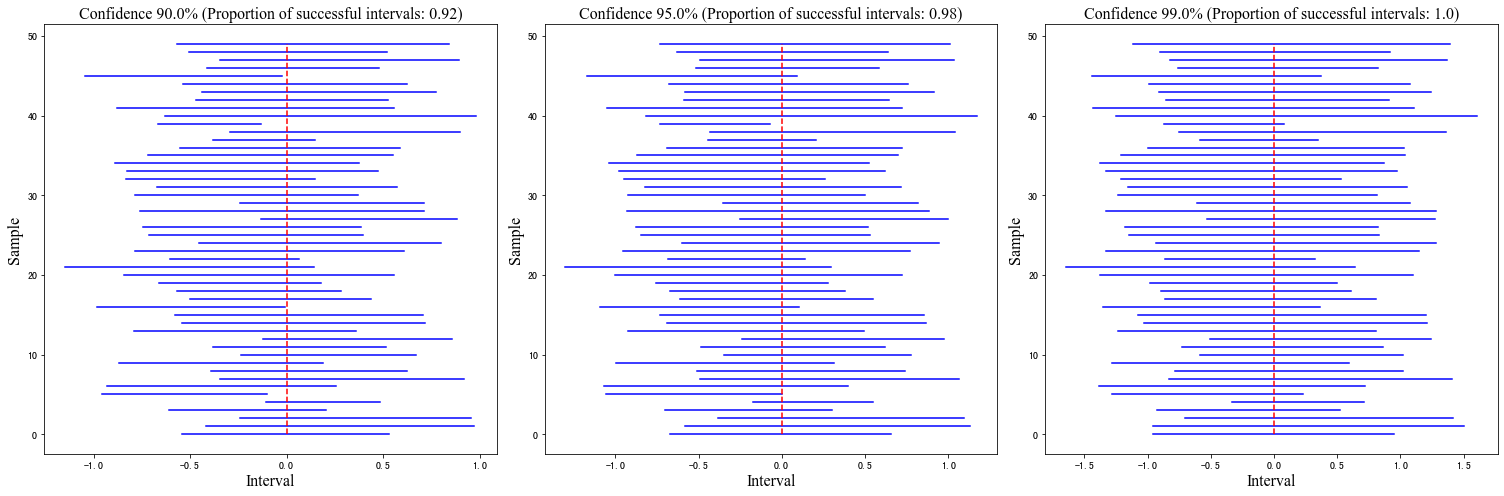

In [3]:
# set parameters
n = 10  # sample size
m = 50  # number of samples
confidence_levels = [0.90, 0.95, 0.99]  # confidence levels

# generate m samples of size n from the N(0,1) distribution
samples = np.random.normal(0, 1, (m, n))
sample_means = np.mean(samples, axis=1)
sample_stds = np.std(samples, axis=1, ddof=1)

# create subplots
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

for i, confidence in enumerate(confidence_levels):
    # calculate t-scores for the given confidence level
    t_scores = stats.t.ppf((1 + confidence) / 2.0, n-1)

    # calculate confidence intervals
    confidence_intervals = np.zeros((m, 2))
    confidence_intervals[:, 0] = sample_means - t_scores * sample_stds / np.sqrt(n)
    confidence_intervals[:, 1] = sample_means + t_scores * sample_stds / np.sqrt(n)

    # calculate the proportion of successful confidence intervals
    successes = np.sum((confidence_intervals[:, 0] <= 0) & (confidence_intervals[:, 1] >= 0))
    proportion = successes / m

    # plot confidence intervals
    for j in range(m):
        axs[i].plot(confidence_intervals[j], [j, j], color='blue')
    axs[i].plot([0, 0], [0, m-1], color='red', linestyle='--')
    axs[i].set_title(f"Confidence {confidence*100}% (Proportion of successful intervals: {proportion})", fontsize=16, fontfamily='Times New Roman')
    axs[i].set_xlabel("Interval", fontsize=16, fontfamily='Times New Roman')
    axs[i].set_ylabel("Sample", fontsize=16, fontfamily='Times New Roman')

plt.tight_layout()
plt.show()